In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

In [2]:
df = pd.read_csv('Dataset B.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,Label
0,0.000000,-0.027949,-0.055898,-0.083847,-0.115428,-0.134872,-0.145898,-0.160428,-0.174530,-0.187693,...,-0.272735,-0.275000,-0.275000,-0.280128,-0.284530,-0.271026,-0.275000,-0.275342,-0.280000,N
1,-0.075000,-0.072287,-0.053644,-0.045931,-0.042713,-0.051782,-0.067207,-0.084241,-0.084575,-0.076690,...,-0.119150,-0.130759,-0.144069,-0.141609,-0.138138,-0.127034,-0.121356,-0.120000,-0.135000,S
2,-0.820000,-0.816812,-0.812248,-0.805873,-0.802248,-0.801879,-0.808255,-0.810000,-0.811006,-0.817382,...,-0.265000,-0.256946,-0.253491,-0.266242,-0.270000,-0.271309,-0.280873,-0.288624,-0.295000,V
3,0.035000,0.042893,0.056929,0.068680,0.075000,0.094288,0.110000,0.115253,0.127715,0.126320,...,-0.282285,-0.278502,-0.270787,-0.270000,-0.270000,-0.263680,-0.255000,-0.263071,-0.265000,S
4,-0.310000,-0.313863,-0.325906,-0.336590,-0.340000,-0.340000,-0.336820,-0.322743,-0.305000,-0.305000,...,-0.190906,-0.184086,-0.181820,-0.185000,-0.185000,-0.202051,-0.221367,-0.236137,-0.240000,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-0.005382,-0.000361,-0.000318,-0.001880,0.009986,0.021725,0.036079,0.033812,0.022121,0.005346,...,-0.302328,-0.300440,-0.295073,-0.303019,-0.308599,-0.313229,-0.305019,-0.302204,-0.285045,S
20631,0.010704,0.014345,0.010120,0.001290,-0.007345,-0.011750,-0.012358,-0.010729,-0.007322,0.000361,...,-0.173342,-0.174075,-0.173802,-0.173729,-0.179811,-0.182776,-0.188970,-0.200194,-0.207486,S
20632,0.029899,0.032533,0.046830,0.053695,0.061880,0.067876,0.073737,0.082986,0.088687,0.087935,...,-0.164682,-0.164780,-0.168206,-0.168573,-0.175680,-0.182027,-0.187626,-0.185533,-0.173940,S
20633,-0.164792,-0.166980,-0.174076,-0.176286,-0.170038,-0.167065,-0.166076,-0.157793,-0.144814,-0.131643,...,-0.364113,-0.367419,-0.368419,-0.366891,-0.370799,-0.370496,-0.363742,-0.354205,-0.348576,S


In [3]:
X_input = df.iloc[:,:-1]
y_input = df.iloc[:,-1]

In [4]:
# Reshape X to (samples, 360, 1)
X = X_input.values.reshape(X_input.shape[0], X_input.shape[1], 1)

In [5]:
# Encode labels (e.g., N=0, F=1, V=2, S=3, Q=4)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_input)

In [6]:
# Split data into train/validate/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [7]:
print("X_train shape:", X_train.shape)  # Should be (samples, 360, 1)
print("y_train shape:", y_train.shape)  # Should be (samples,)
print("X_val shape:", X_val.shape)  
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)  
print("y_test shape:", y_test.shape)

X_train shape: (12381, 1800, 1)
y_train shape: (12381,)
X_val shape: (4127, 1800, 1)
y_val shape: (4127,)
X_test shape: (4127, 1800, 1)
y_test shape: (4127,)


In [8]:
#Module for model training/validation
def model_eval(mdoel, loader, criterion, device):
    mdoel.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = val_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [9]:
#Module for model tetsing
def model_test(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [11]:
#RUN HYBRID MODEL
import torch
import torch.nn as nn
import torch.optim as optim

class HybridModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(HybridModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size=64, hidden_size=64, num_layers=2, batch_first=True)
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape for CNN (batch_size, features, sequence_length) 
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 90, 64) for LSTM
        x, _ = self.lstm(x)  # Output shape: (batch_size, 90, 64)
        x = x[:, -1, :]  # Output shape: (batch_size, 64) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # Number of output classes (e.g., 5 for N/F/V/S/Q)

# Initialize model
model = HybridModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 1.4237, Train Accuracy: 32.81%,Val Loss: 1.2964, Val Acc: 40.59%
Test Loss: 1.3009, Test Accuracy: 40.76%
Epoch [2/20], Train Loss: 1.1589, Train Accuracy: 51.00%,Val Loss: 0.9882, Val Acc: 61.52%
Test Loss: 1.0171, Test Accuracy: 58.30%
Epoch [3/20], Train Loss: 0.9940, Train Accuracy: 60.56%,Val Loss: 0.9508, Val Acc: 63.73%
Test Loss: 0.9810, Test Accuracy: 61.45%
Epoch [4/20], Train Loss: 0.9087, Train Accuracy: 64.53%,Val Loss: 0.8793, Val Acc: 66.22%
Test Loss: 0.8958, Test Accuracy: 65.30%
Epoch [5/20], Train Loss: 0.8152, Train Accuracy: 68.68%,Val Loss: 0.7158, Val Acc: 72.67%
Test Loss: 0.7287, Test Accuracy: 71.48%
Epoch [6/20], Train Loss: 0.8236, Train Accuracy: 67.56%,Val Loss: 0.8008, Val Acc: 70.08%
Test Loss: 0.8268, Test Accuracy: 68.55%
Epoch [7/20], Train Loss: 0.7565, Train Accuracy: 69.91%,Val Loss: 0.6810, Val Acc: 73.32%
Test Loss: 0.6938, Test Accuracy: 71.82%
Epoch [8/20], Train Loss: 0.6753, Train Accuracy: 73.64%,Val Loss: 0.6069, V

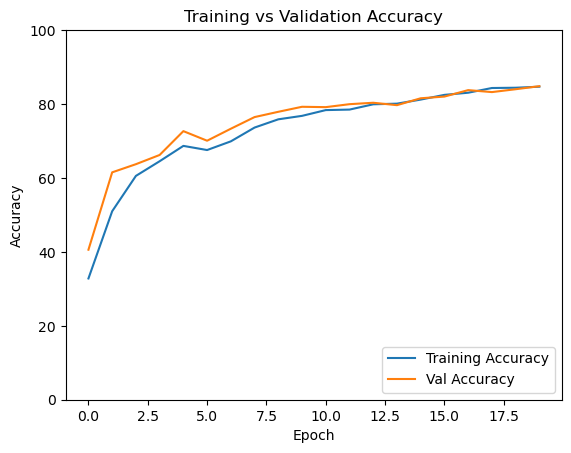

In [12]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [25]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 77.85%


In [26]:
# Get predictions for the test set
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

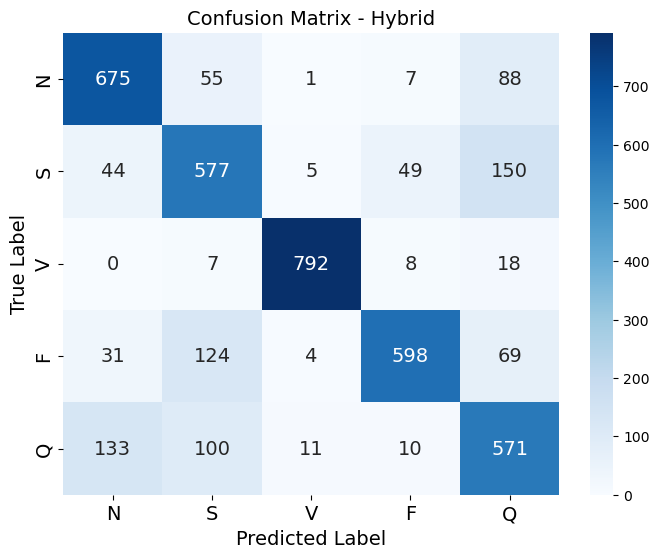

In [28]:
#Display confusion Matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - Hybrid', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.76      0.82      0.79       826
           S       0.67      0.70      0.68       825
           V       0.97      0.96      0.97       825
           F       0.89      0.72      0.80       826
           Q       0.64      0.69      0.66       825

    accuracy                           0.78      4127
   macro avg       0.79      0.78      0.78      4127
weighted avg       0.79      0.78      0.78      4127



In [33]:
# Get the classification report as a dictionary
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df = pd.DataFrame(report).transpose()

# Round to 4 decimal places
report_df = report_df.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.7644  0.8172    0.7899   826.0000
S                0.6686  0.6994    0.6836   825.0000
V                0.9742  0.9600    0.9670   825.0000
F                0.8899  0.7240    0.7984   826.0000
Q                0.6373  0.6921    0.6636   825.0000
accuracy         0.7785  0.7785    0.7785     0.7785
macro avg        0.7869  0.7785    0.7805  4127.0000
weighted avg     0.7869  0.7785    0.7805  4127.0000


In [41]:
#Run CNN Model
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        self.cnn_output_size = self._calculate_cnn_output_size(1800)
                
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(self.cnn_output_size, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )

    def _calculate_cnn_output_size(self, input_sequence_length):
        x = torch.randn(1, 1, input_sequence_length)  # Helper function to calculate the output size of the CNN layers
        x = self.cnn(x)
        return x.view(1, -1).size(1)  # Flatten and get the number of features
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 1, 360)
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.view(x.size(0), -1) #Flatten to (batch_size, 64 * 90) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # 5 for N/F/V/S/Q

# Initialize model
model = CNNModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 0.7192, Train Accuracy: 73.25%,Val Loss: 0.4716, Val Acc: 82.46%
Test Loss: 0.5023, Test Accuracy: 81.03%
Epoch [2/20], Train Loss: 0.4580, Train Accuracy: 83.89%,Val Loss: 0.4047, Val Acc: 85.78%
Test Loss: 0.4125, Test Accuracy: 84.93%
Epoch [3/20], Train Loss: 0.3415, Train Accuracy: 88.05%,Val Loss: 0.3116, Val Acc: 89.41%
Test Loss: 0.3180, Test Accuracy: 89.14%
Epoch [4/20], Train Loss: 0.2766, Train Accuracy: 90.47%,Val Loss: 0.2922, Val Acc: 89.90%
Test Loss: 0.2923, Test Accuracy: 90.09%
Epoch [5/20], Train Loss: 0.2230, Train Accuracy: 92.50%,Val Loss: 0.2879, Val Acc: 90.77%
Test Loss: 0.2899, Test Accuracy: 90.62%
Epoch [6/20], Train Loss: 0.1822, Train Accuracy: 93.66%,Val Loss: 0.2723, Val Acc: 91.20%
Test Loss: 0.2893, Test Accuracy: 91.11%
Epoch [7/20], Train Loss: 0.1551, Train Accuracy: 94.77%,Val Loss: 0.2709, Val Acc: 91.16%
Test Loss: 0.2745, Test Accuracy: 91.18%
Epoch [8/20], Train Loss: 0.1364, Train Accuracy: 95.23%,Val Loss: 0.2733, V

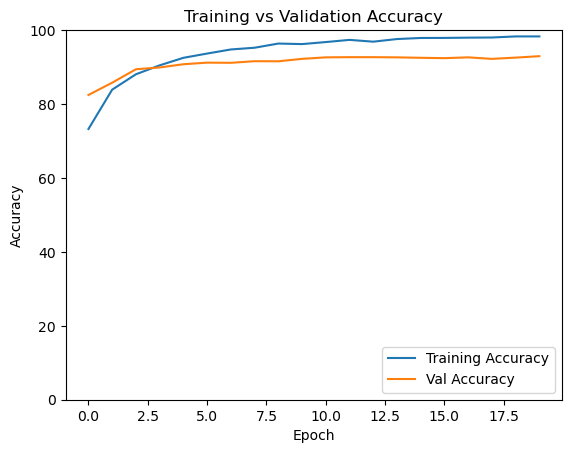

In [43]:
# Convert data to PyTorch tensors
X_train_tensor_2 = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor_2 = torch.tensor(y_train, dtype=torch.long)
X_val_tensor_2 = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor_2 = torch.tensor(y_val, dtype=torch.long)
X_test_tensor_2 = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor_2 = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor_2, y_train_tensor_2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor_2, y_val_tensor_2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor_2, y_test_tensor_2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses_2 = []
train_accuracies_2 = []
val_losses_2 = []
val_accuracies_2 = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses_2.append(train_loss)
    train_accuracies_2.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses_2.append(val_loss)
    val_accuracies_2.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies_2, label='Training Accuracy')
plt.plot(val_accuracies_2, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [44]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 92.83%


In [45]:
# Get predictions for the test set
y_true_2 = []
y_pred_2 = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true_2.extend(labels.cpu().numpy())
        y_pred_2.extend(predicted.cpu().numpy())

y_true_2 = np.array(y_true_2)
y_pred_2 = np.array(y_pred_2)

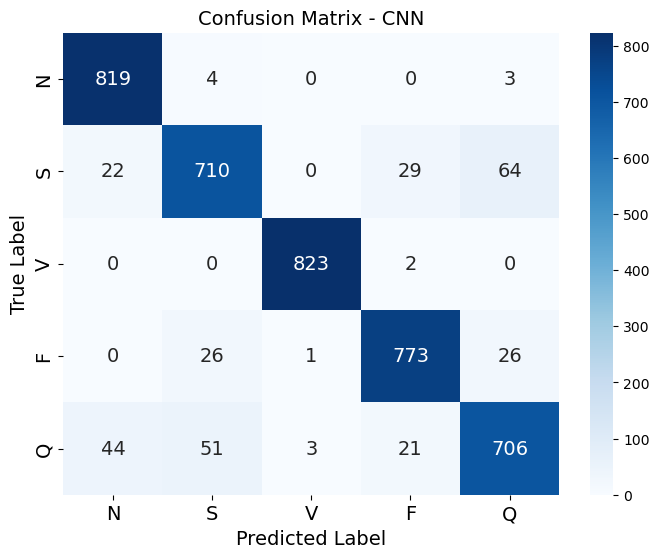

In [46]:
#Display confusion matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_2, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - CNN', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_2, y_pred_2, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.99      0.96       826
           S       0.90      0.86      0.88       825
           V       1.00      1.00      1.00       825
           F       0.94      0.94      0.94       826
           Q       0.88      0.86      0.87       825

    accuracy                           0.93      4127
   macro avg       0.93      0.93      0.93      4127
weighted avg       0.93      0.93      0.93      4127



In [48]:
# Get the classification report as a dictionary
report_2 = classification_report(y_true_2, y_pred_2, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df_2 = pd.DataFrame(report_2).transpose()

# Round to 4 decimal places
report_df_2 = report_df_2.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df_2)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.9254  0.9915    0.9573   826.0000
S                0.8976  0.8606    0.8787   825.0000
V                0.9952  0.9976    0.9964   825.0000
F                0.9370  0.9358    0.9364   826.0000
Q                0.8836  0.8558    0.8695   825.0000
accuracy         0.9283  0.9283    0.9283     0.9283
macro avg        0.9278  0.9283    0.9277  4127.0000
weighted avg     0.9278  0.9283    0.9277  4127.0000


In [73]:
#RUN LSTM MODEL
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)
        
        # Dropout
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM layers
        out, _ = self.lstm1(x, (h0, c0))
        out = self.bn1(out.transpose(1, 2)).transpose(1, 2)  # BatchNorm after LSTM
        out = self.dropout(out)
        
        out, _ = self.lstm2(out, (h0, c0))
        out = self.bn2(out.transpose(1, 2)).transpose(1, 2)  # BatchNorm after LSTM
        out = self.dropout(out)
        
        # Take the output of the last time step
        out = out[:, -1, :]
        
        # Fully connected layers
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        
        return out

# Hyperparameters
input_size = 1  # Number of features per time step
hidden_size = 64  # Number of LSTM units
num_layers = 1  # Number of LSTM layers
num_classes = len(np.unique(y))  # Number of output classes

# Initialize model
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

C:\Users\User\anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch [1/20], Train Loss: 1.4073, Train Accuracy: 38.65%,Val Loss: 1.3654, Val Acc: 42.33%
Test Loss: 1.3662, Test Accuracy: 42.72%
Epoch [2/20], Train Loss: 1.2943, Train Accuracy: 44.86%,Val Loss: 1.4424, Val Acc: 38.50%
Test Loss: 1.4615, Test Accuracy: 37.41%
Epoch [3/20], Train Loss: 1.2777, Train Accuracy: 46.14%,Val Loss: 1.2943, Val Acc: 43.57%
Test Loss: 1.2951, Test Accuracy: 43.06%
Epoch [4/20], Train Loss: 1.2393, Train Accuracy: 46.93%,Val Loss: 1.2948, Val Acc: 48.24%
Test Loss: 1.3082, Test Accuracy: 47.93%
Epoch [5/20], Train Loss: 1.1196, Train Accuracy: 51.57%,Val Loss: 1.1020, Val Acc: 52.10%
Test Loss: 1.1097, Test Accuracy: 50.67%
Epoch [6/20], Train Loss: 1.0541, Train Accuracy: 55.27%,Val Loss: 1.0901, Val Acc: 52.14%
Test Loss: 1.1056, Test Accuracy: 50.55%
Epoch [7/20], Train Loss: 0.8915, Train Accuracy: 63.57%,Val Loss: 1.5424, Val Acc: 31.60%
Test Loss: 1.5377, Test Accuracy: 32.08%
Epoch [8/20], Train Loss: 0.8052, Train Accuracy: 67.65%,Val Loss: 0.7520, V

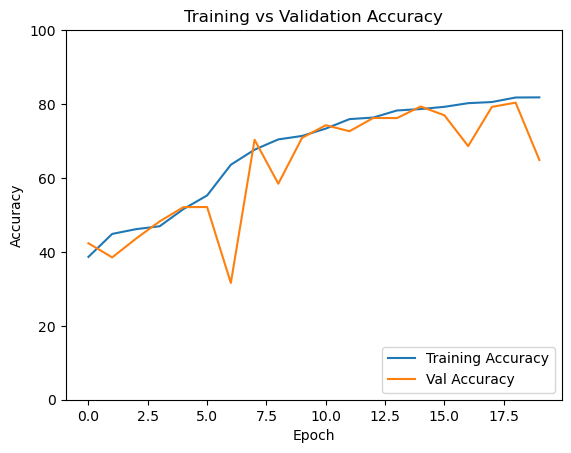

In [75]:
# Convert data to PyTorch tensors
X_train_tensor_3 = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor_3 = torch.tensor(y_train, dtype=torch.long)
X_val_tensor_3 = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor_3 = torch.tensor(y_val, dtype=torch.long)
X_test_tensor_3 = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor_3 = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor_3, y_train_tensor_3)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor_3, y_val_tensor_3)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor_3, y_test_tensor_3)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses_3 = []
train_accuracies_3 = []
val_losses_3 = []
val_accuracies_3 = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses_3.append(train_loss)
    train_accuracies_3.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses_3.append(val_loss)
    val_accuracies_3.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy (took around 4 mins)
plt.plot(train_accuracies_3, label='Training Accuracy')
plt.plot(val_accuracies_3, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [76]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 62.22%


In [77]:
# Get predictions for the test set
y_true_3 = []
y_pred_3 = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true_3.extend(labels.cpu().numpy())
        y_pred_3.extend(predicted.cpu().numpy())

y_true_3 = np.array(y_true_3)
y_pred_3 = np.array(y_pred_3)

In [23]:
#Display confusion matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_3, y_pred_3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - LSTM', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

NameError: name 'y_true_3' is not defined

In [79]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_3, y_pred_3, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.59      0.55      0.57       826
           S       0.78      0.43      0.56       825
           V       0.92      0.91      0.91       825
           F       0.59      0.38      0.46       826
           Q       0.44      0.83      0.58       825

    accuracy                           0.62      4127
   macro avg       0.66      0.62      0.62      4127
weighted avg       0.66      0.62      0.62      4127



In [80]:
# Get the classification report as a dictionary
report_3 = classification_report(y_true_3, y_pred_3, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df_3 = pd.DataFrame(report_3).transpose()

# Round to 4 decimal places
report_df_3 = report_df_3.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df_3)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.5925  0.5545    0.5729   826.0000
S                0.7761  0.4327    0.5556   825.0000
V                0.9182  0.9115    0.9148   825.0000
F                0.5907  0.3826    0.4644   826.0000
Q                0.4448  0.8303    0.5793   825.0000
accuracy         0.6222  0.6222    0.6222     0.6222
macro avg        0.6644  0.6223    0.6174  4127.0000
weighted avg     0.6644  0.6222    0.6173  4127.0000


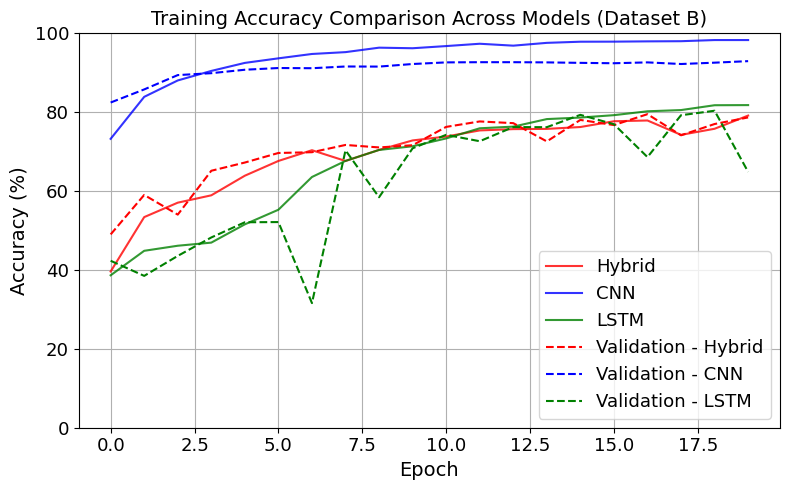

In [81]:
#Compare all 3 models
plt.figure(figsize=(8, 5))

# Plot training accuracy for all three models
plt.plot(train_accuracies, label='Hybrid', color='red', alpha = 0.8)
plt.plot(train_accuracies_2, label='CNN', color = 'blue', alpha = 0.8)
plt.plot(train_accuracies_3, label='LSTM', color = 'green', alpha = 0.8)

plt.plot(val_accuracies, label='Validation - Hybrid', color='red', linestyle = 'dashed')
plt.plot(val_accuracies_2, label='Validation - CNN', color = 'blue', linestyle = 'dashed')
plt.plot(val_accuracies_3, label='Validation - LSTM', color = 'green', linestyle = 'dashed')

# Add labels and styling
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy (%)', fontsize = 14)
plt.ylim([0, 100])
plt.title('Training Accuracy Comparison Across Models (Dataset B)', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', fontsize = 13)
plt.grid(True)
plt.tight_layout()
plt.show()

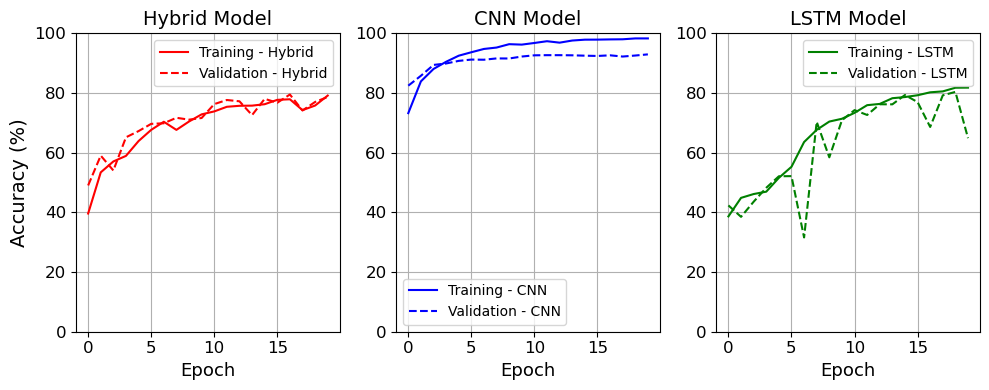

In [82]:
fig, axs = plt.subplots(1,3,figsize=(10,4),sharex=True)
#For Hybrid
axs[0].plot(train_accuracies, label='Training - Hybrid',color='red')
axs[0].plot(val_accuracies, label='Validation - Hybrid',color='red', linestyle='dashed')
axs[0].set_title('Hybrid Model', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=13)
axs[0].set_ylabel('Accuracy (%)', fontsize=14)
axs[0].set_ylim([0, 100])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend()
axs[0].grid(True)

#For CNN
axs[1].plot(train_accuracies_2, label='Training - CNN',color='blue')
axs[1].plot(val_accuracies_2, label='Validation - CNN',color='blue', linestyle='dashed')
axs[1].set_title('CNN Model', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=13)
#axs[1].set_ylabel('Accuracy (%)', fontsize=12)
axs[1].set_ylim([0, 100])
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend()
axs[1].grid(True)

#For LSTM
axs[2].plot(train_accuracies_3, label='Training - LSTM',color='green')
axs[2].plot(val_accuracies_3, label='Validation - LSTM',color='green', linestyle='dashed')
axs[2].set_title('LSTM Model', fontsize=14)
axs[2].set_xlabel('Epoch', fontsize=13)
#axs[2].set_ylabel('Accuracy (%)', fontsize=12)
axs[2].set_ylim([0, 100])
axs[2].tick_params(axis='x', labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()